In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#original = pd.read_csv('original_data.csv')

In [3]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [4]:
test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [5]:
train.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [6]:
test.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [7]:
df_combined = pd.concat([train, ], ignore_index=True)

In [8]:
df_combined = df_combined.drop_duplicates()

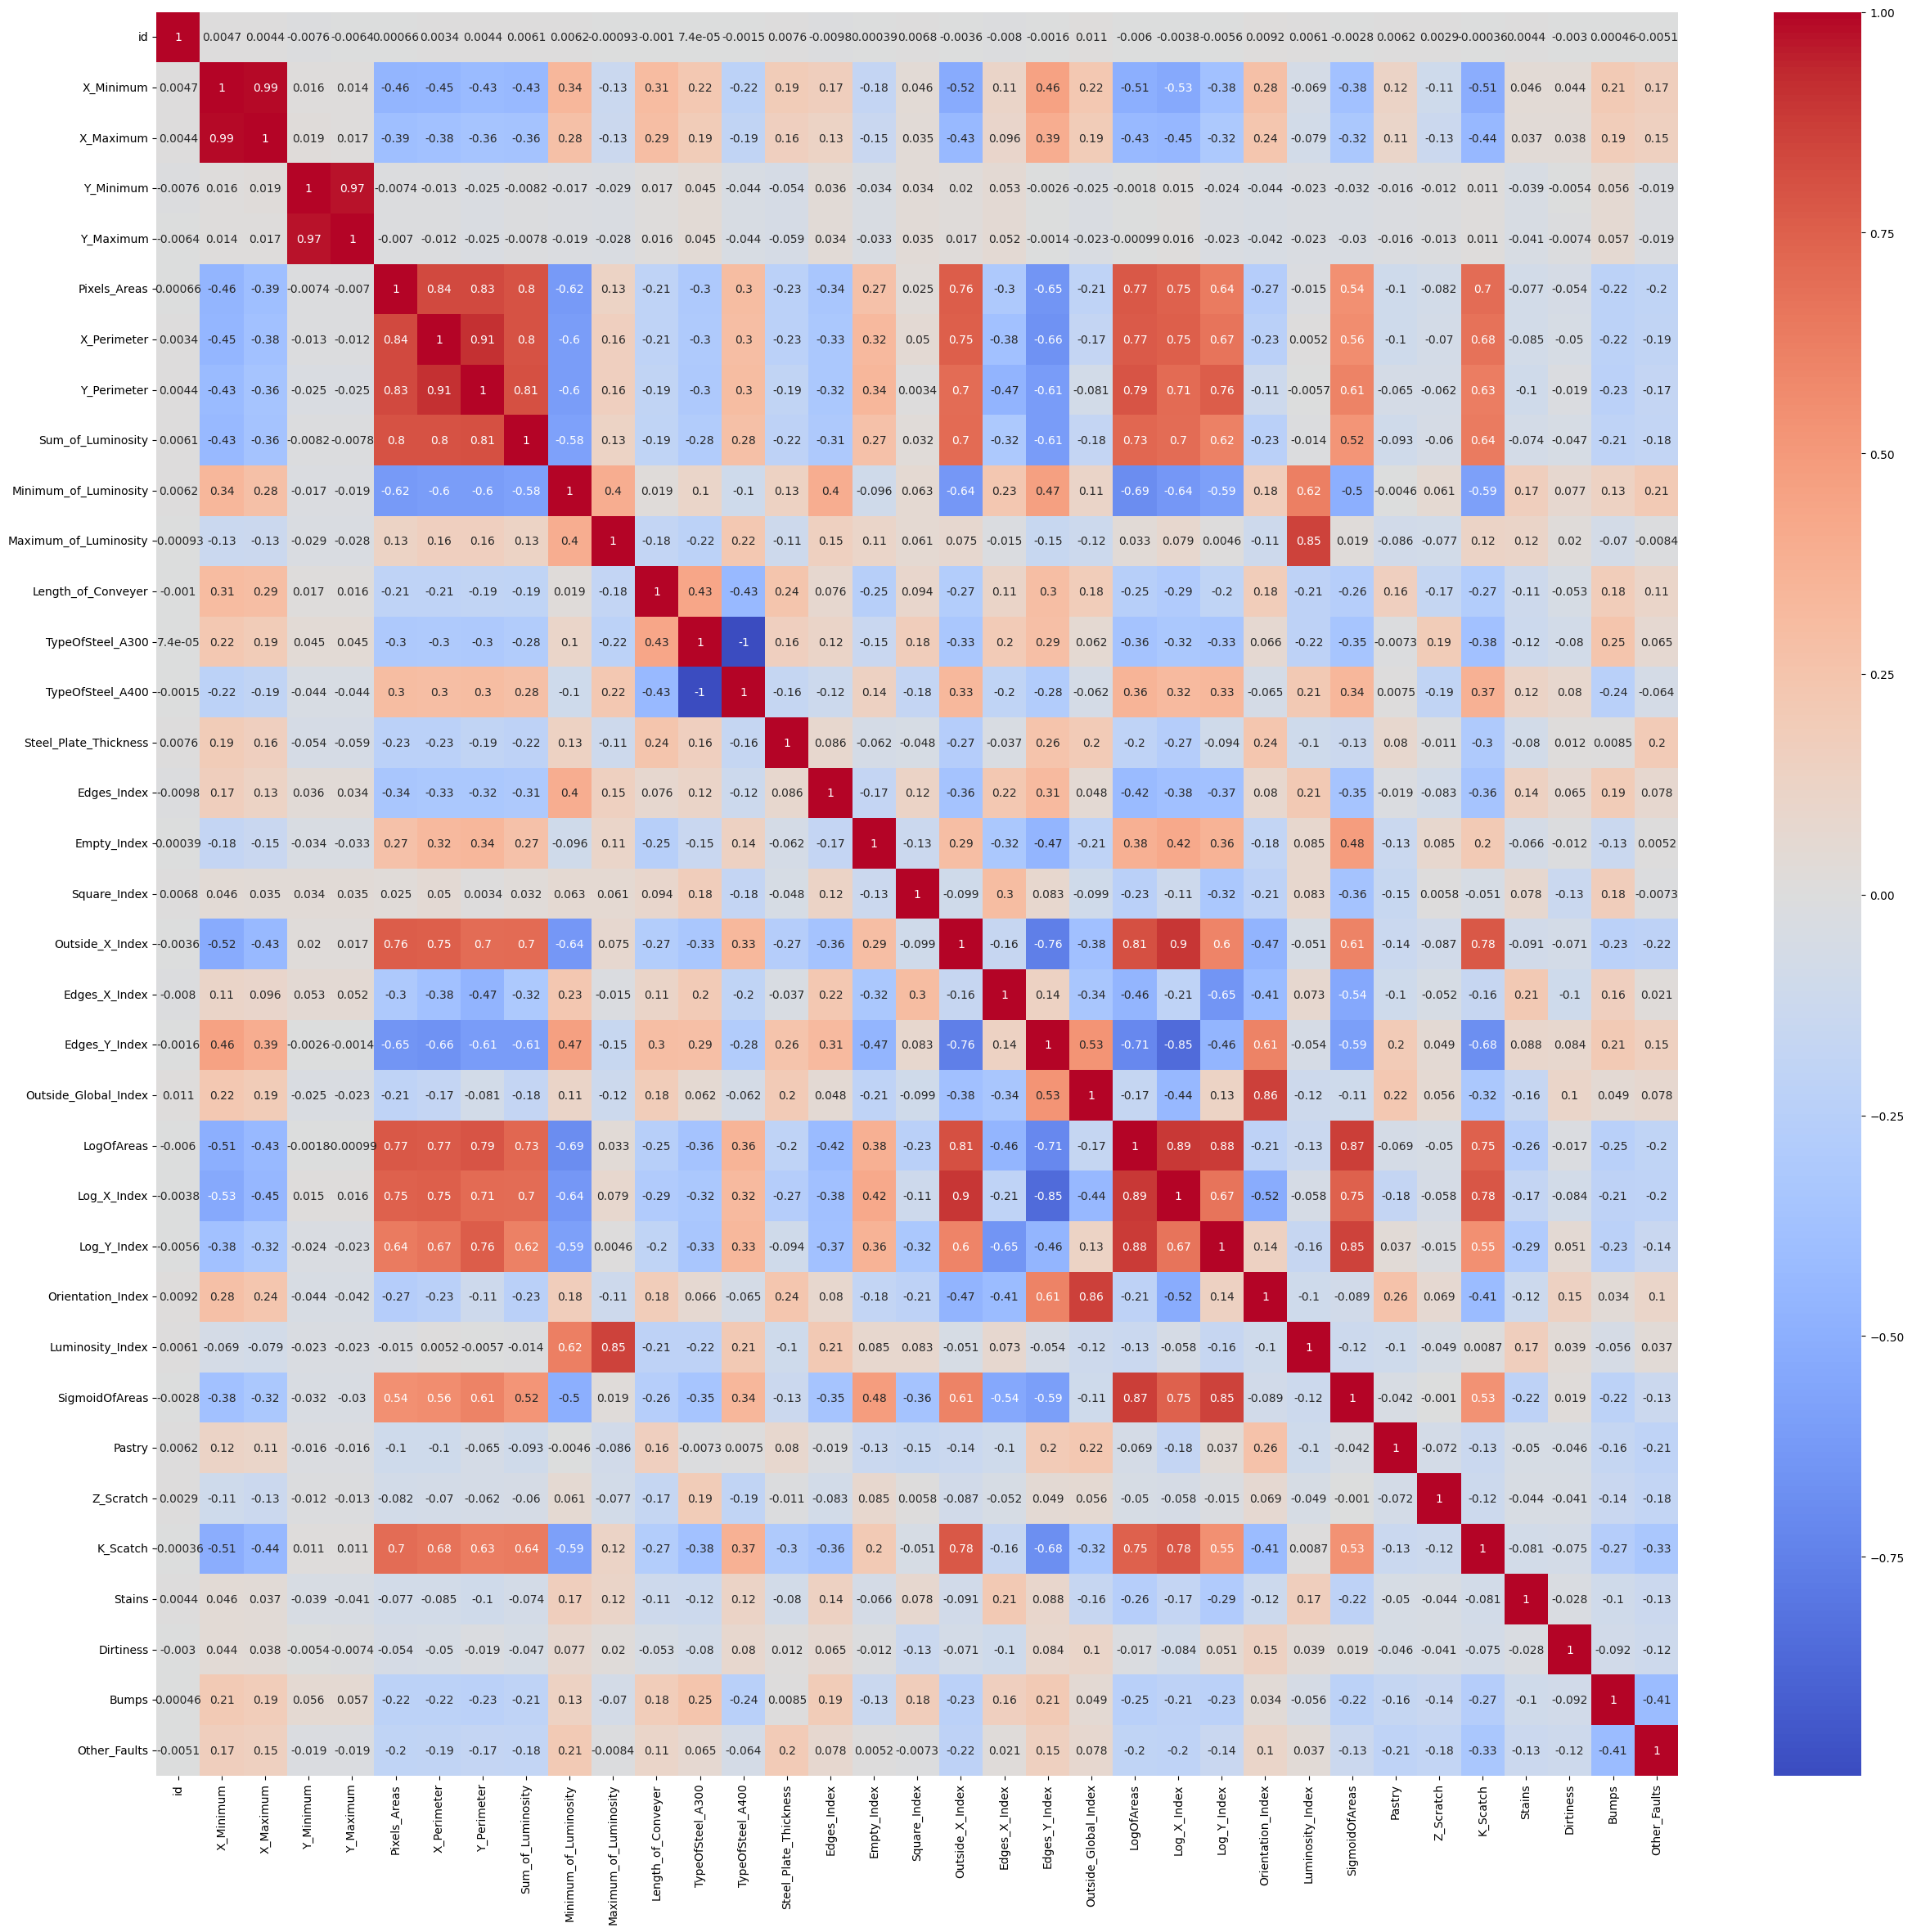

In [9]:
import seaborn as sns
matrix = df_combined.corr()
plt.figure(figsize=(30,28))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
X = df_combined.drop(['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis=1)
y = df_combined[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

In [11]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
import optuna
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

def objective(trial, X_train, y_train, X_test, y_test):
    # Define parameters to be optimized for XGBClassifier
    param = {
        "objective": "binary:logistic", # for binary classification
        "eval_metric": "logloss", # for log loss
        "verbosity": 0,
        "booster": "gbtree",
        "random_state": 42,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.05),
        "n_estimators": trial.suggest_int("n_estimators", 400, 600),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.8, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
    }

    # Create an instance of XGBClassifier with the suggested parameters
    xgb_classifier = XGBClassifier(**param)
    
    # Initialize scores
    scores = []

    # Train one classifier per output
    for i in range(y_train.shape[1]):
        # Fit the classifier on the training data for the ith output
        xgb_classifier.fit(X_train, y_train[:, i])

        # Predict probabilities for the ith output on the test data
        y_proba = xgb_classifier.predict_proba(X_test)[:, 1]

        # Compute ROC AUC for the ith output
        roc_auc = roc_auc_score(y_test[:, i], y_proba)
        
        # Append the score to the list
        scores.append(roc_auc)

    # Return the mean ROC AUC score across all outputs
    return sum(scores) / len(scores)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2, random_state=42)  

# Set up the sampler for Optuna optimization
sampler = optuna.samplers.TPESampler(seed=42)  

# Create a study object for Optuna optimization
study = optuna.create_study(direction="maximize", sampler=sampler)

# Run the optimization process
study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=100)

# Get the best parameters after optimization
best_params = study.best_params

print('='*50)
print(best_params)


[I 2024-03-24 19:32:11,147] A new study created in memory with name: no-name-31cfd031-775a-407d-8614-7c2779e08c01
[I 2024-03-24 19:32:19,458] Trial 0 finished with value: 0.8883712355713437 and parameters: {'learning_rate': 0.0249816047538945, 'n_estimators': 591, 'reg_alpha': 0.7319939418114051, 'reg_lambda': 0.5986584841970366, 'max_depth': 4, 'subsample': 0.8311989040672406, 'colsample_bytree': 0.33485016730091965, 'min_child_weight': 8.795585311974417}. Best is trial 0 with value: 0.8883712355713437.
[I 2024-03-24 19:32:37,081] Trial 1 finished with value: 0.8820017574299598 and parameters: {'learning_rate': 0.034044600469728355, 'n_estimators': 542, 'reg_alpha': 0.020584494295802447, 'reg_lambda': 0.9699098521619943, 'max_depth': 9, 'subsample': 0.8424678221356553, 'colsample_bytree': 0.4090949803242604, 'min_child_weight': 2.650640588680904}. Best is trial 0 with value: 0.8883712355713437.
[I 2024-03-24 19:32:49,170] Trial 2 finished with value: 0.8859427868237955 and parameters:

{'learning_rate': 0.025287014397684028, 'n_estimators': 449, 'reg_alpha': 0.29576734548819167, 'reg_lambda': 0.9244190315689459, 'max_depth': 4, 'subsample': 0.8395104311515115, 'colsample_bytree': 0.3796358517471078, 'min_child_weight': 3.0089652263005626}


In [14]:
best_params = {'learning_rate': 0.022010447885280397, 'n_estimators': 594, 'reg_alpha': 0.41935204383394226, 'reg_lambda': 0.21958573114732574, 'max_depth': 4, 'subsample': 0.8386364297020318, 'colsample_bytree': 0.35318139121245257, 'min_child_weight': 6.694192810680147}

In [15]:
from xgboost import XGBClassifier
model = XGBClassifier(**best_params)
tmodel=model.fit(X, y)



In [16]:
features = test.drop(['id'], axis=1)
predictions = tmodel.predict_proba(features)

In [17]:
target_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
submission2 = pd.DataFrame(predictions, columns=target_columns)

In [18]:
submission2['id']=test['id']

In [19]:
submission2

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,id
0,0.499625,0.000656,0.003670,0.000065,0.020762,0.168217,0.357785,19219
1,0.242695,0.019172,0.005166,0.000218,0.151276,0.168804,0.334876,19220
2,0.001532,0.035717,0.031853,0.000297,0.004285,0.306930,0.454641,19221
3,0.138931,0.001069,0.000565,0.000693,0.009758,0.358995,0.436283,19222
4,0.002450,0.001280,0.000606,0.003604,0.006713,0.620543,0.349965,19223
...,...,...,...,...,...,...,...,...
12809,0.072922,0.081742,0.002876,0.000088,0.019061,0.197921,0.385641,32028
12810,0.166154,0.003659,0.028354,0.007810,0.108302,0.209927,0.395848,32029
12811,0.000549,0.000370,0.911749,0.000112,0.000312,0.000959,0.074459,32030
12812,0.329241,0.013003,0.019627,0.000066,0.055305,0.157411,0.300777,32031


In [20]:
submission2.to_csv('submission_steel_plate.csv', index=False)